# Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import wave
import struct
import matplotlib.pyplot as plt
import glob
import os

path = os.getcwd()
# name_bases = os.listdir(path+'/extendedballroom_v1.1/')


# Variaveis global

In [2]:

arquivo= glob.glob(path+'/extendedballroom_v1.1/*/*.wav')
linha = len(arquivo)
contador = 0


# Criando a Matriz de armazenamento de dados

In [3]:
matriz = []
for i in range(linha):
    matriz.append([])
    for j in range(5):
        matriz[i].append([])

# Função de Extração de Caracteristicas


In [4]:
def extrassao_de_dados_da_classe(caminho,linhas):
    opened_audio = wave.open(caminho, "rb").getparams()
    
    
    #pegar nome da pasta
    final = caminho.rfind("/")
    inicio = caminho.rfind("/",1,final-1)
    nome_base=caminho[inicio+1:final]
    
       
    armazena_dados_na_matriz(opened_audio[2], opened_audio[0], (opened_audio[1]**4), opened_audio[3]/opened_audio[2], nome_base)
    
    return contador + 1
    

# Salva os dados na matriz

In [5]:
def armazena_dados_na_matriz(taxa,canais,bits,duracao, nome_base):
    matriz[contador][0] = taxa
    matriz[contador][1] = canais
    matriz[contador][2] = bits
    matriz[contador][3] = duracao
    matriz[contador][4] = nome_base


# Abre todos os aquivos .wav da pasta (Nome da pasta)


In [6]:
for i in arquivo:
    contador = extrassao_de_dados_da_classe(i,linha)
    

# Salvando arquivo .csv

In [7]:
cabecario = ['Sampling_Rate','Channels','Bits','Duration','Class']
pd.DataFrame(matriz).to_csv(path+f"/csv/Base_Ballroom.csv", header = cabecario)

In [8]:
#mostrar arquivo
metadata_path = pd.read_csv(path+f"/csv/Base_Ballroom.csv",index_col = 0)
metadata_path
  

,Sampling_Rate,Channels,Bits,Duration,Class
0,44100,2,16,30.040816,Foxtrot
1,48000,2,16,30.000000,Foxtrot
2,44100,2,16,30.040816,Foxtrot
3,48000,2,16,30.000000,Foxtrot
4,48000,2,16,30.000000,Foxtrot
5,48000,2,16,30.000000,Foxtrot
6,48000,2,16,30.000000,Foxtrot
7,44100,2,16,29.988571,Foxtrot
8,44100,2,16,30.040816,Foxtrot
9,48000,2,16,30.000000,Foxtrot


# Plotagem de gráficos

## Gráfico do Tamanho dos aúdios

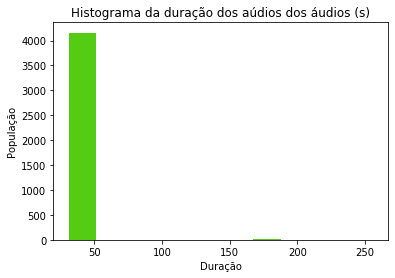

In [9]:
plt.hist(metadata_path['Duration'], rwidth=0.9, color='#54CC14')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração')
plt.ylabel('População')
plt.title('Histograma da duração dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()



## Gráfico da Frequência dos aúdios

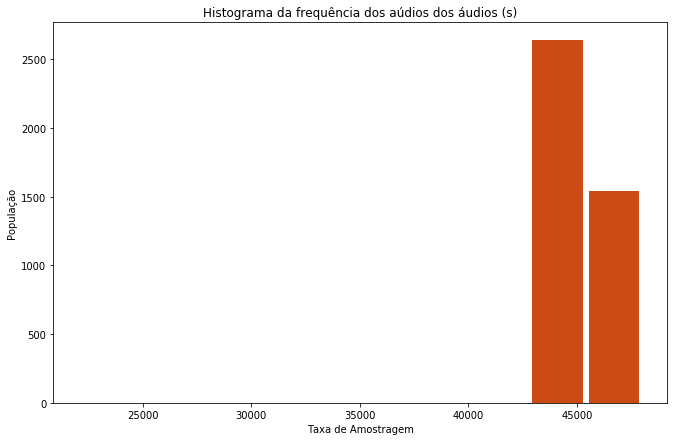

In [10]:
plt.hist(metadata_path['Sampling_Rate'], rwidth=0.9, color='#CC4A14')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Taxa de Amostragem')
plt.ylabel('População')
plt.title('Histograma da frequência dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

## Gráfico dos Bits dos aúdios

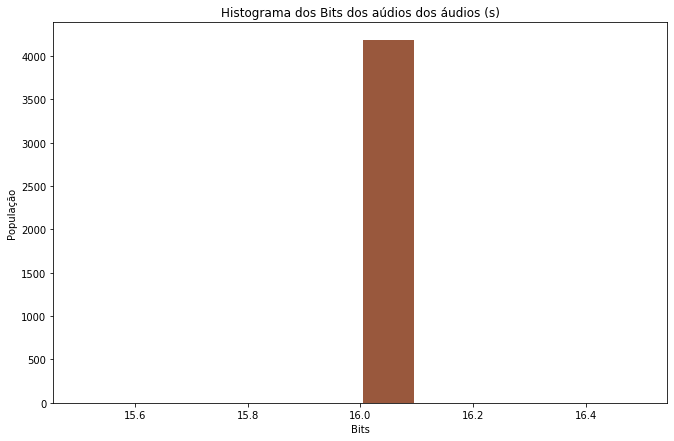

In [11]:
plt.hist(metadata_path['Bits'], rwidth=0.9, color='#99583D')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Bits')
plt.ylabel('População')
plt.title('Histograma dos Bits dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

## Gráfico dos Canais dos aúdios

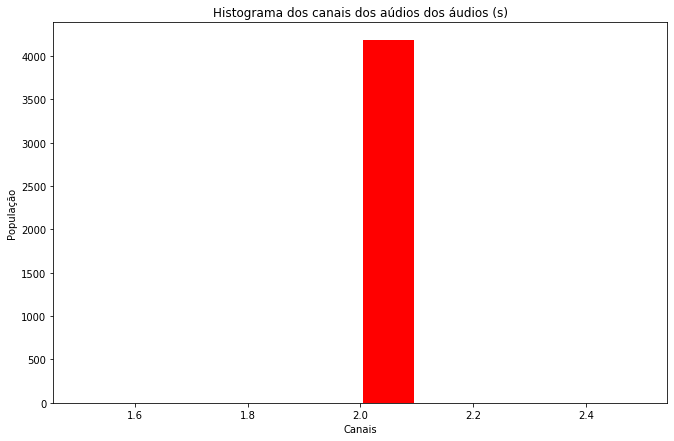

In [12]:
plt.hist(metadata_path['Channels'], rwidth=0.9, color='#FF0000')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Canais')
plt.ylabel('População')
plt.title('Histograma dos canais dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

## Gráfico das Classes dos aúdios

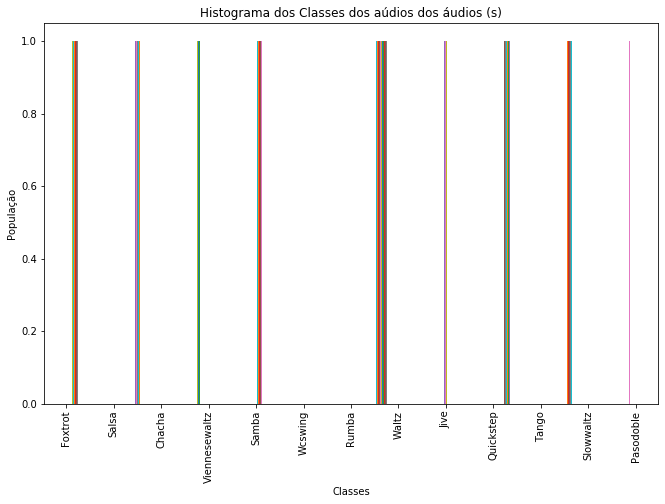

In [16]:
plt.hist(metadata_path['Class'])
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Classes')
plt.xticks(rotation=90)
plt.ylabel('População')
plt.title('Histograma dos Classes dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

# Quantidade de aúdios por classe

In [14]:
print(metadata_path['Class'].value_counts().to_frame())

               Class
Waltz            529
Foxtrot          507
Quickstep        497
Rumba            470
Samba            468
Tango            464
Chacha           455
Jive             350
Viennesewaltz    252
Slowwaltz         65
Pasodoble         53
Salsa             47
Wcswing           23
